# CREATE THE SENTENCES RESPONSIBLE FOR THE SCATTER: 
***

In [2]:
import openai
from openai import OpenAI
import math
import torch
import pandas as pd
import os 
import vec2text
from openai.resources import embeddings as OpenAI_embed_class
import numpy as np

key = "sk-proj-qkvfLuY17OrXweVBFwf3T3BlbkFJRQisxXitvKVkwVi3Dq7m"
os.environ["OPENAI_API_KEY"] = key




c:\Users\14158\miniconda3\envs\sky\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
!openai --version

openai 1.2.0


In [20]:
client = OpenAI(api_key=key)
corrector = vec2text.load_pretrained_corrector("text-embedding-ada-002")
embed_Class = OpenAI_embed_class.Embeddings(client)


def get_embeddings_openai(text_list, model="text-embedding-ada-002") -> torch.Tensor:
    batches = math.ceil(len(text_list) / 128)
    outputs = []
    for batch in range(batches):
        text_list_batch = text_list[batch * 128 : (batch + 1) * 128]
        response = embed_Class.create(
            input=text_list_batch,

            model=model,
            encoding_format="float",  # override default base64 encoding...
        )
    outputs.extend([e.embedding for e in response.data])
    return torch.tensor(outputs)


#Trying to generate outputs from openai gpt4o model
model_engine = "gpt-4o"

prompt = "Hello I was wondering if you could generate me 50 randomly generated sentences. These sentences can be of any length measuring from 1-infinite words. I'd probably make the sentences of a regular length so nothing absurd please. These sentences can also be of any topic. I would try to limit the use of wordiness in your words. Don't add any unnessesary words to the prompt if it's not needed.\n\n I would like the sentences to be outputted in a python list.\nfor example: Output -> [\"sentence1\", \"sentence2\", \"other sentences\"]\nCould you please do this for me?\n Make sure to output no other responce other than the a python list itself. I don't want you to say anything. "

completion = client.chat.completions.create(
    model=model_engine,
    messages=[{"role": "system", "content": "You are a helpful assistant"},
              {"role": "user", "content": prompt}
              ]
)

# Extract the output
output = completion.choices[0].message.content
print(output)
print(type(output))

["The cat jumped over the fence.", "She enjoys reading mystery novels.", "He walks his dog every morning.", "They traveled to Japan last summer.", "The sun sets in the west.", "She baked a delicious chocolate cake.", "He fixed the broken car.", "They watched a movie together.", "The flowers in the garden are blooming.", "She wrote a letter to her friend.", "He plays the guitar beautifully.", "They bought a new house.", "The kids are playing in the park.", "She drinks coffee every morning.", "He is learning to speak French.", "They went hiking in the mountains.", "The rain is pouring heavily.", "She is wearing a beautiful dress.", "He cleaned the entire house.", "They are planning a trip to Europe.", "The dinner was served at seven.", "She painted a landscape.", "He is working on a new project.", "They adopted a puppy.", "The book was an interesting read.", "She sings in the church choir.", "He loves to cook Italian food.", "They celebrated their anniversary.", "The museum has a new exh

In [30]:
print(type(output))
print(len(output))




<class 'list'>
50


In [31]:
#Get the embeddings from openai genereated sentences: 
embeddings = get_embeddings_openai(output)

In [37]:
from scipy.stats import multivariate_normal

# define the mean vecto and covaraince matrix
python_embeddings = embeddings.numpy()

mean, co = multivariate_normal.fit(x=python_embeddings)

#Generate the vectors
vectors = np.random.multivariate_normal(mean,co, 400)



In [38]:
# Generate strings from created vectors

tensor_list_vectors = torch.tensor(vectors)
for item in tensor_list_vectors:
    torch.tensor(item, dtype=torch.float32)

tensor_list_vectors = torch.tensor(tensor_list_vectors, dtype=torch.float32)

print(tensor_list_vectors)



# Get the strings from the generated vectors
output_strings = vec2text.invert_embeddings(
    
    embeddings=tensor_list_vectors, #from above
    corrector=corrector,
    num_steps=3,

)


C:\Users\14158\AppData\Local\Temp\ipykernel_25132\3504637139.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(item, dtype=torch.float32)
C:\Users\14158\AppData\Local\Temp\ipykernel_25132\3504637139.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor_list_vectors = torch.tensor(tensor_list_vectors, dtype=torch.float32)


tensor([[ 0.0016, -0.0001,  0.0147,  ..., -0.0044, -0.0163, -0.0130],
        [-0.0036,  0.0122, -0.0087,  ..., -0.0210, -0.0067, -0.0226],
        [-0.0219, -0.0082,  0.0195,  ..., -0.0279,  0.0168, -0.0312],
        ...,
        [ 0.0034, -0.0032,  0.0266,  ...,  0.0046, -0.0038, -0.0191],
        [-0.0179, -0.0018,  0.0237,  ..., -0.0171,  0.0268, -0.0283],
        [ 0.0325,  0.0097, -0.0088,  ...,  0.0210, -0.0101, -0.0270]])


In [39]:
print(output_strings)
print()


['A book was broken. They took the trip to the park and got a look at the posed fence.', 'The bike was in a new garage. He is doing work on the blooming garden and repairing every stall.', 'She likes to swoop through her petticoat. She swoops through her petticoat every morning.', 'She sung a verse every morning. She sung on her church cake.', 'The broom is jogging by the house on the garden. It is in all its clean condition.', 'He was dancing the rain. The landscape is beautiful and deeply wrought.', 'The dress arrived in a stoopy car. The church is brightly clear.', 'He eats his French onion every morning. He is busy with buying a healthy dog in the house.', 'She dances in the mountains. In the last summer they went all over Italy.', 'She calmed herself by repairing the water on her cake. The event was an amazing event.', 'She is studying new shamanism. She is walking in a flower garden.', 'The two of them loved their evening together. They are on a new movie project in the park.', '

In [43]:
#Get Output scatter strings:

df = pd.DataFrame(output_strings, columns=['Column Name'])
csv_file_path = '../data/scatter_quotes.csv'
df.to_csv(csv_file_path, index=False)  # index=False to avoid writing row indices


#Get Output scatter Tensor_Embeddings: 

numpy_array = tensor_list_vectors.cpu().numpy()
df = pd.DataFrame(numpy_array)
csv_file_path = '../data/scatter_embeddings.csv'
df.to_csv(csv_file_path, index=False)



### Next steps for when I get back:
Plugin in heart shape and apply neirest neighbor and format the output files to correct type. See if they work in html file and run the project. 

Upload to github after version is good


# START OF NN: 
***

In [1]:
import vec2text
import torch
from transformers import AutoModel, AutoTokenizer, PreTrainedTokenizer, PreTrainedModel
import numpy as np

def get_gtr_embeddings(text_list,
                       encoder: PreTrainedModel,
                       tokenizer: PreTrainedTokenizer) -> torch.Tensor:

    inputs = tokenizer(text_list,
                       return_tensors="pt",
                       max_length=128,
                       truncation=True,
                       padding="max_length",).to("cuda")

    with torch.no_grad():
        model_output = encoder(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])
        hidden_state = model_output.last_hidden_state
        embeddings = vec2text.models.model_utils.mean_pool(hidden_state, inputs['attention_mask'])

    return embeddings


encoder = AutoModel.from_pretrained("sentence-transformers/gtr-t5-base").encoder.to("cuda")
tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/gtr-t5-base")
corrector = vec2text.load_pretrained_corrector("gtr-base")

/home/brody/BrodyCode/ProfCode/ipynb/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/brody/BrodyCode/ProfCode/ipynb/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of T5Model were not initialized from the model checkpoint at sentence-transformers/gtr-t5-base and are newly initialized: ['decoder.block.0.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.0.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight',

In [3]:
import pandas as pd
from matplotlib.widgets import Button
from umap import UMAP

data = pd.read_csv("~/BrodyCode/SkyWriteFinal/data/scatter_quotes.csv")

# Extract the quotes from the data
quotes = data['Quotes'].tolist()

# Use the T5 model to generate embeddings for the quotes
quote_embeddings = get_gtr_embeddings(quotes, encoder, tokenizer)

# Convert the embeddings to a numpy array
quote_embeddings = np.array([x.cpu().numpy().T for x in quote_embeddings])

# Use UMAP to reduce the dimensionality of the embeddings
umap = UMAP(n_neighbors=10, min_dist=0.3, metric='cosine', random_state=42).fit(quote_embeddings)
quote_embedding = umap.transform(quote_embeddings)

# Create a dataframe from the embeddings
df_quotes = pd.DataFrame(quote_embedding, columns=['x', 'y'])

/home/brody/BrodyCode/ProfCode/ipynb/.venv/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/brody/BrodyCode/ProfCode/ipynb/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [11]:
import pandas as pd

heart = pd.read_csv("~/BrodyCode/SkyWriteFinal/data/heartshape.csv",header=None)
heart.columns =['x','y']

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
mms = MinMaxScaler(feature_range=(2,7))
scaled_heart = mms.fit_transform(heart)
print(scaled_heart)

df_scaled_heart = pd.DataFrame(scaled_heart, columns=['x', 'y'])
df_scaled_heart.to_json('~/BrodyCode/SkyWriteFinal/data/scaledheartshape.jsonl', orient='records', lines=True)




[[4.5        5.84526625]
 [4.54334397 6.07470545]
 [4.8125     6.58955777]
 [5.38388348 7.        ]
 [6.12379763 6.98136764]
 [6.75305266 6.47606263]
 [7.         5.67048142]
 [6.75305266 4.80551777]
 [6.12379763 4.01002554]
 [5.38388348 3.29225386]
 [4.8125     2.65398711]
 [4.54334397 2.1795129 ]
 [4.5        2.        ]
 [4.45665603 2.1795129 ]
 [4.1875     2.65398711]
 [3.61611652 3.29225386]
 [2.87620237 4.01002554]
 [2.24694734 4.80551777]
 [2.         5.67048142]
 [2.24694734 6.47606263]
 [2.87620237 6.98136764]
 [3.61611652 7.        ]
 [4.1875     6.58955777]
 [4.45665603 6.07470545]
 [4.5        5.84526625]]


In [15]:
mms2 = MinMaxScaler(feature_range=(1,8))
quote_embeddings_scaled = mms2.fit_transform(quote_embedding)

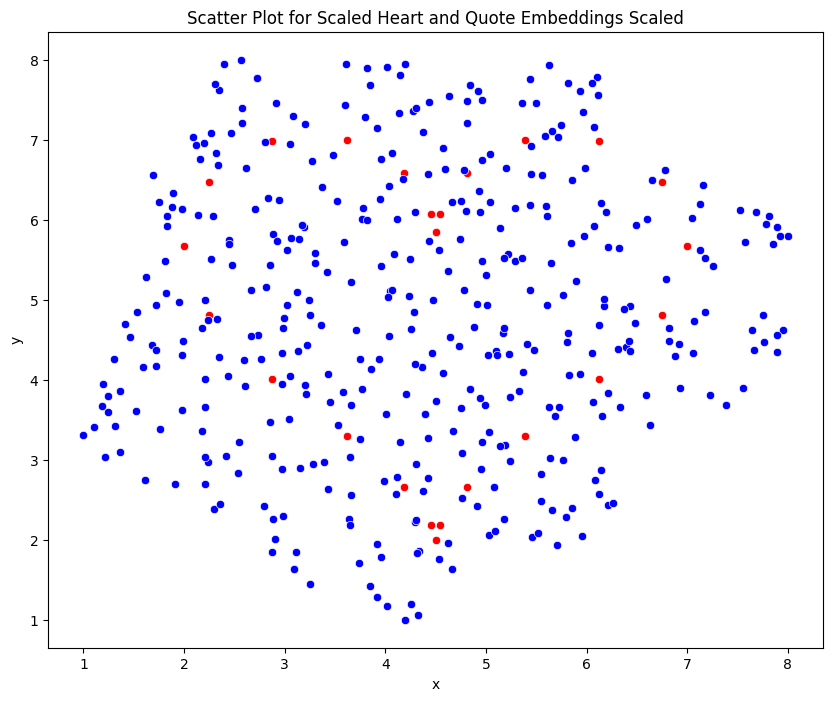

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame from the scaled heart data
df_scaled_heart = pd.DataFrame(scaled_heart, columns=['x', 'y'])

# Create a DataFrame from the quote embeddings scaled data
df_quote_embeddings_scaled = pd.DataFrame(quote_embeddings_scaled, columns=['x', 'y'])

# Plot the scaled heart data
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_scaled_heart, x='x', y='y', color='red')

# Overlay the quote embeddings scaled data
sns.scatterplot(data=df_quote_embeddings_scaled, x='x', y='y', color='blue')

plt.title('Scatter Plot for Scaled Heart and Quote Embeddings Scaled')
plt.show()


In [20]:
#Combine both the dataframes into one jsonl: 

import pandas as pd


combined_df = pd.concat([df_scaled_heart, df_quote_embeddings_scaled])
combined_df.to_json('~/BrodyCode/SkyWriteFinal/data/scaledheartembeddings_scatterembeddings.jsonl', orient='records', lines=True)


In [21]:
from scipy.spatial import distance_matrix


# Compute pairwise distances
distances = distance_matrix(df_scaled_heart.values, df_quote_embeddings_scaled.values)

# Convert to DataFrame
# df_distances = pd.DataFrame(distances, columns=df_quote_embeddings_scaled.index, index=df_scaled_heart.index)


In [22]:
print(distances.shape)

(25, 400)


In [23]:
nearest_points = np.unique(distances.argmin(axis=1))

In [24]:
nearest_points

array([  8,  13,  31,  46,  51,  74,  89, 103, 109, 126, 127, 132, 153,
       154, 205, 209, 210, 211, 270, 308, 334, 339, 376])

In [25]:
embedding_landmarks = quote_embeddings[nearest_points]

In [26]:
embedding_landmarks.shape

(23, 768)

In [27]:
#BRODY RUN THIS CELL FOR THE SAKE OF HUMANITY: 


mixed_embeddings_landmarks = []
mixed_text_landmarks = []
for i in range(len(embedding_landmarks)):
    try:
        start = embedding_landmarks[i]
        end = embedding_landmarks[i+1]
    except IndexError:
        start = embedding_landmarks[-1]
        end = embedding_landmarks[0]

    for alpha in np.arange(0.0, 1.0, 0.1):
        mixed_embedding = torch.lerp(input=torch.tensor(start).to('cuda'), end=torch.tensor(end).to('cuda'), weight=alpha)
        text = vec2text.invert_embeddings(
            embeddings=mixed_embedding[None].cuda(),
            corrector=corrector,
            #editied step so that I can test better with the data for the front end portions of the project: 

            
            num_steps=10,
            sequence_beam_width=4,
        )[0]
        print(f'alpha={alpha:.1f}\t', text)
        mixed_embeddings_landmarks.append(mixed_embedding)
        mixed_text_landmarks.append(text)

alpha=0.0	 She dances in the mountains.       In the last summer they went all over Italy.
alpha=0.1	        She dances in the mountains. In the last summer they went all over Italy.
alpha=0.2	 She dances in the mountains.        In the last summer they went all over Italy.
alpha=0.3	 She dances in the mountains. On the last summer they are going all over Italy.       
alpha=0.4	 She dances in the mountains. In the last summer, they plan to go all over the mountains in Italy.    
alpha=0.5	 She dresses and dances in the mountains. On the last summer they plan to go to the mountains in Italy.    
alpha=0.6	 She dresses on a beautiful guitar and dances.   During their last trip in Italy, she plans to go in the mountains.
alpha=0.7	 She plans to go in the mountains. She likes to dance on the guitar with a beautiful dress in Italy.    
alpha=0.8	 She is planning to go to the mountains. She likes to do a beautiful dress in the mountains, and she plays the guitar in.
alpha=0.9	 She is planni

In [45]:
mixed_embeddings_landmarks

[tensor([-1.0078e-02,  3.1482e-02, -1.7383e-02,  1.6665e-02,  7.3785e-02,
         -3.0339e-02,  1.3601e-02,  6.3474e-03, -4.8381e-02, -3.3943e-02,
          1.0713e-02,  2.9815e-02,  5.6371e-02,  2.9916e-02,  1.4827e-02,
          1.2599e-02,  1.4077e-03,  9.1037e-02,  2.4639e-02, -3.9034e-02,
         -3.3161e-02, -4.8297e-03,  1.4651e-02, -3.7094e-02, -1.1256e-02,
         -5.5342e-02,  1.0035e-02, -4.0258e-02, -2.0421e-02,  1.9433e-02,
         -3.1057e-02,  3.0235e-02,  7.1901e-02, -9.0467e-02,  6.1521e-02,
         -1.3567e-02, -1.9650e-02,  4.1251e-02,  7.1703e-02, -2.9470e-03,
          5.5942e-02, -4.4255e-03,  3.6247e-02, -3.1176e-02, -1.5271e-02,
          5.5657e-03, -2.4902e-02,  1.6240e-03, -9.6382e-03,  1.8815e-02,
          2.0859e-02,  1.3854e-02, -8.9056e-03,  2.1967e-03, -1.0620e-02,
         -1.4024e-02,  2.8343e-02, -5.9392e-02, -6.5487e-02, -1.1306e-02,
         -4.4792e-02, -1.2362e-02,  1.4699e-02, -1.6021e-02, -3.2894e-02,
         -6.3180e-02, -6.0416e-02,  4.

In [28]:
mixed_embeddings_landmarks_cpu = np.array([x.cpu().numpy().T for x in mixed_embeddings_landmarks])

In [32]:
embeds = umap.transform(mixed_embeddings_landmarks_cpu)

# Create a DataFrame from the embeddings
df_embeds = pd.DataFrame(embeds, columns=['x', 'y'])


#TODO: ADD THE QUOTES TO THIS jsonl file. 
# Save DataFrame to a JsonL file: 
df_embeds.to_json('~/BrodyCode/SkyWriteFinal/data/NearestNeighborEmbeddings.jsonl', orient='records', lines=True)


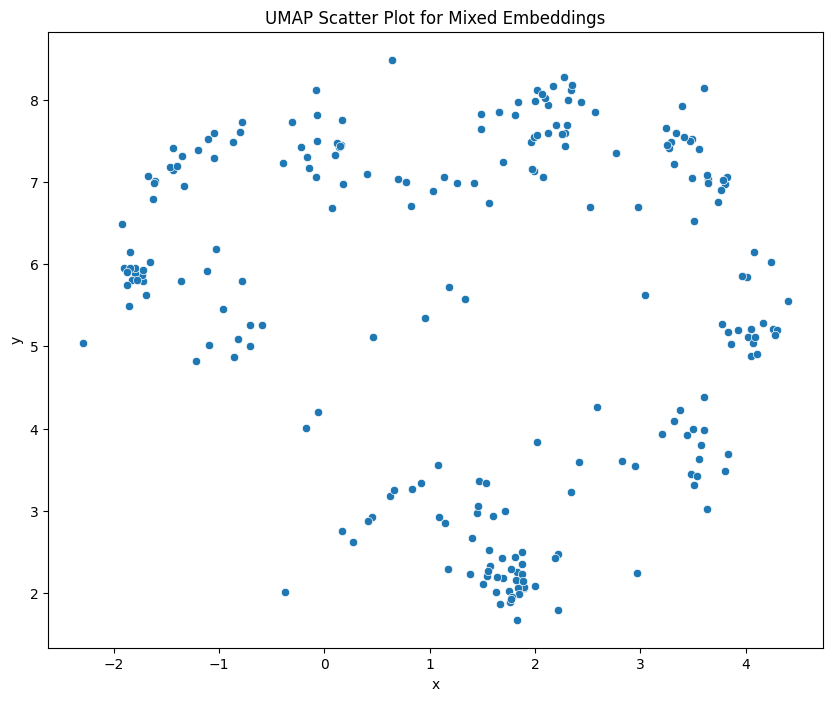

In [34]:
new_embeds = UMAP(n_neighbors=160, min_dist=0, metric='cosine', ).fit_transform(mixed_embeddings_landmarks_cpu)
# Create a DataFrame from the embeddings
df_embeds = pd.DataFrame(embeds, columns=['x', 'y'])




# Plot the embeddings
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df_embeds, x='x', y='y')
plt.title('UMAP Scatter Plot for Mixed Embeddings')


plt.show()

In [49]:
new_embeds

array([[ 3.7516844 ,  3.404176  ],
       [ 3.8367133 ,  3.32818   ],
       [ 3.9179208 ,  3.3241658 ],
       [ 3.7648492 ,  3.2092102 ],
       [ 3.4734056 ,  3.120265  ],
       [ 3.3703597 ,  2.8421674 ],
       [ 3.2061846 ,  2.6824365 ],
       [ 3.0055754 ,  2.4787767 ],
       [ 2.9247131 ,  2.4264529 ],
       [ 2.8254762 ,  2.3087974 ],
       [ 2.623611  ,  2.1526964 ],
       [ 2.7749472 ,  2.2596781 ],
       [ 2.5632582 ,  2.0492668 ],
       [ 2.4331272 ,  2.127741  ],
       [ 2.487679  ,  2.216454  ],
       [ 2.284274  ,  2.0712404 ],
       [ 2.0478184 ,  1.965835  ],
       [ 2.0058312 ,  1.9525663 ],
       [ 1.9308444 ,  1.8755383 ],
       [ 1.6980326 ,  1.952927  ],
       [ 1.6072769 ,  2.0990918 ],
       [ 1.7457626 ,  1.9936373 ],
       [ 1.499795  ,  2.1374996 ],
       [ 1.3264823 ,  2.3162878 ],
       [ 1.0684608 ,  2.4814124 ],
       [ 0.4227477 ,  3.0053163 ],
       [ 0.14541788,  3.251055  ],
       [-0.05864011,  3.3883984 ],
       [-0.0486112 ,

<Axes: xlabel='x', ylabel='y'>

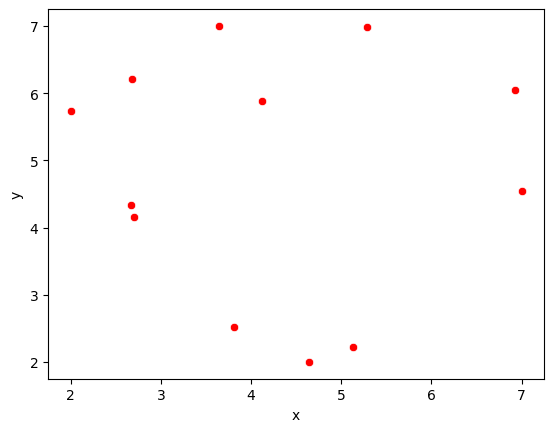

In [50]:
sns.scatterplot(data=df_scaled_heart, x='x', y='y', color='red')

In [36]:
#Take all the vectors and make them into text: 



# Create a DataFrame from the embeddings
df_embeds = pd.DataFrame(mixed_text_landmarks, columns=['quotes'])


#TODO: ADD THE QUOTES TO THIS jsonl file. 
# Save DataFrame to a JsonL file: 
df_embeds.to_json('~/BrodyCode/SkyWriteFinal/data/NearestNeighborQuotes.jsonl', orient='records', lines=True)
